In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [3]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [5]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


In [6]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(280, 14)

In [7]:
df.count()

complex.id         92771
gene               92771
cdr3               92771
v.segm             92670
j.segm             91626
species            92771
mhc.a              92771
mhc.b              92771
mhc.class          92771
antigen.epitope    92771
antigen.gene       92709
antigen.species    92771
vdjdb.score        92771
meta               92771
dtype: int64

### Dropping duplicate columns

In [8]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92491, 14)

### Dropping missing and null value

In [9]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm               99
j.segm             1141
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [10]:
df=df.dropna()
df.shape

(91274, 14)

### Dropping low score data

In [11]:
df = df[(df['vdjdb.score'] == 2) | (df['vdjdb.score'] == 3)]
df.shape

(3871, 14)

In [12]:
df.columns

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'],
      dtype='object')

In [13]:
df=df.dropna()
df.shape

(3871, 14)

**After dropping null value**
* Bulleted

In [14]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [15]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
20263,1499,TRA,CALSHYSGTYKYIF,TRAV9-2*01,TRAJ40*01,HomoSapiens,HLA-DQA1*01:02,HLA-DQB1*05:02,MHCII,MHQKRTAMFQDPQER,E6,HPV-16,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
20264,1499,TRB,CASSEGTDYGYTF,TRBV6-1*01,TRBJ1-2*01,HomoSapiens,HLA-DQA1*01:02,HLA-DQB1*05:02,MHCII,MHQKRTAMFQDPQER,E6,HPV-16,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
20265,1500,TRA,CAENSGGSNYKLTF,TRAV13-2*01,TRAJ53*01,HomoSapiens,HLA-DRA*01,HLA-DRB5*01:01,MHCII,VVVGAVGVGKSALTIQLIQN,KRAS,HomoSapiens,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [16]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [17]:
df_dash.head(3)

,subject,epitope,count,v_a_gene,j_a_gene,cdr3_a_aa,cdr3_a_nucseq,v_b_gene,j_b_gene,cdr3_b_aa,cdr3_b_nucseq,clone_id
0,mouse_subject0050,PA,2,TRAV7-3*01,TRAJ33*01,CAVSLDSNYQLIW,tgtgcagtgagcctcgatagcaactatcagttgatctgg,TRBV13-1*01,TRBJ2-3*01,CASSDFDWGGDAETLYF,tgtgccagcagtgatttcgactggggaggggatgcagaaacgctgt...,mouse_tcr0072.clone
1,mouse_subject0050,PA,6,TRAV6D-6*01,TRAJ56*01,CALGDRATGGNNKLTF,tgtgctctgggtgacagggctactggaggcaataataagctgactttt,TRBV29*01,TRBJ1-1*01,CASSPDRGEVFF,tgtgctagcagtccggacaggggtgaagtcttcttt,mouse_tcr0096.clone
2,mouse_subject0050,PA,1,TRAV6D-6*01,TRAJ49*01,CALGSNTGYQNFYF,tgtgctctgggctcgaacacgggttaccagaacttctatttt,TRBV29*01,TRBJ1-5*01,CASTGGGAPLF,tgtgctagcacagggggaggggctccgcttttt,mouse_tcr0276.clone


## Installing tcrdist3 package ##

In [18]:
# pip install tcrdist3
# installing tcrdist3

In [19]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [20]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [21]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [22]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [23]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene']]

In [24]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef


# Separating data set in to alpha and beta dataframe

In [25]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
df = pd.concat([df_alpha, df_beta], ignore_index=True)
df

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,cdr3_b_aa,v_b_gene,j_b_gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,NaN,NaN,NaN
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,NaN,NaN,NaN
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3866,30550,TRB,NaN,NaN,NaN,HomoSapiens,PQPELPYPQPQL,Gluten,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01
3867,30551,TRB,NaN,NaN,NaN,HomoSapiens,FPQPEQPFPWQP,Gluten,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01
3868,30552,TRB,NaN,NaN,NaN,HomoSapiens,FPQPEQPFPWQP,Gluten,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01
3869,30554,TRB,NaN,NaN,NaN,HomoSapiens,QLQPFPQPELPY,Gluten,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01


In [26]:
df_alpha.reset_index(drop=True, inplace=True)
df_beta.reset_index(drop=True, inplace=True)
df.reset_index(drop=True,inplace=True)

In [27]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef
...,...,...,...,...,...,...,...,...
1376,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten
1377,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten
1378,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten
1379,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten


In [28]:
df_alpha['species'].unique()


array(['HomoSapiens', 'MusMusculus'], dtype=object)

# Removing mouse and monkey

In [29]:
df = df[~df['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [30]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [31]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1380
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex.id    1316 non-null   int64 
 1   gene          1316 non-null   object
 2   cdr3_a_aa     1316 non-null   object
 3   v_a_gene      1316 non-null   object
 4   j_a_gene      1316 non-null   object
 5   species       1316 non-null   object
 6   epitope       1316 non-null   object
 7   antigen.gene  1316 non-null   object
dtypes: int64(1), object(7)
memory usage: 92.5+ KB


## Dropping null values

In [32]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())
df_beta=df_beta.dropna()

complex.id      0
gene            0
cdr3_a_aa       0
v_a_gene        0
j_a_gene        0
species         0
epitope         0
antigen.gene    0
dtype: int64


## Dropping duplicates

In [33]:
df_alpha=df_alpha.drop_duplicates()
df_beta=df_beta.drop_duplicates()
df=df.drop_duplicates()
df.shape

(3348, 11)

## Run TCRDist on alpha gene dataset

In [34]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/13 [00:00<?, ?it/s]

  (0, 0)	-1
  (1, 1)	-1
  (2, 2)	-1
  (2, 3)	48
  (2, 453)	48
  (2, 580)	48
  (3, 2)	48
  (3, 3)	-1
  (3, 453)	24
  (3, 580)	24
  (4, 4)	-1
  (4, 80)	45
  (4, 81)	45
  (4, 768)	48
  (5, 5)	-1
  (5, 9)	48
  (5, 11)	45
  (5, 15)	48
  (5, 16)	48
  (5, 17)	48
  (5, 20)	48
  (5, 129)	48
  (5, 316)	39
  (5, 681)	48
  (5, 755)	48
  :	:
  (1272, 708)	29
  (1272, 709)	29
  (1272, 1272)	-1
  (1272, 1273)	42
  (1273, 47)	48
  (1273, 243)	48
  (1273, 337)	48
  (1273, 441)	44
  (1273, 568)	44
  (1273, 953)	48
  (1273, 1272)	42
  (1273, 1273)	-1
  (1273, 1274)	42
  (1274, 337)	42
  (1274, 1135)	24
  (1274, 1273)	42
  (1274, 1274)	-1
  (1275, 1275)	-1
  (1276, 1276)	-1
  (1277, 1277)	-1
  (1278, 400)	48
  (1278, 527)	48
  (1278, 1022)	36
  (1278, 1129)	48
  (1278, 1278)	-1


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/21 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 64)	48
  (0, 94)	42
  (0, 96)	48
  (0, 98)	48
  (0, 418)	48
  (0, 632)	30
  (0, 633)	45
  (0, 727)	48
  (0, 728)	39
  (1, 1)	-1
  (2, 2)	-1
  (2, 488)	-1
  (2, 489)	12
  (2, 1035)	24
  (3, 3)	-1
  (4, 4)	-1
  (4, 1761)	42
  (4, 1774)	42
  (5, 5)	-1
  (6, 6)	-1
  (6, 738)	36
  (7, 7)	-1
  (7, 176)	48
  (7, 206)	39
  :	:
  (2064, 2062)	15
  (2064, 2063)	21
  (2064, 2064)	-1
  (2065, 2065)	-1
  (2066, 1626)	48
  (2066, 1634)	36
  (2066, 1637)	46
  (2066, 1975)	48
  (2066, 2066)	-1
  (2067, 181)	48
  (2067, 215)	48
  (2067, 216)	48
  (2067, 217)	48
  (2067, 220)	36
  (2067, 635)	48
  (2067, 1031)	48
  (2067, 1032)	48
  (2067, 1236)	21
  (2067, 1259)	45
  (2067, 1367)	21
  (2067, 1390)	45
  (2067, 1677)	36
  (2067, 2067)	-1
  (2068, 963)	36
  (2068, 2068)	-1


# Visualize part

In [35]:
# pip install umap-learn

In [36]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,1
...,...,...,...,...,...,...,...,...,...
1376,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,1
1377,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,1
1378,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,1
1379,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,1


In [37]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)

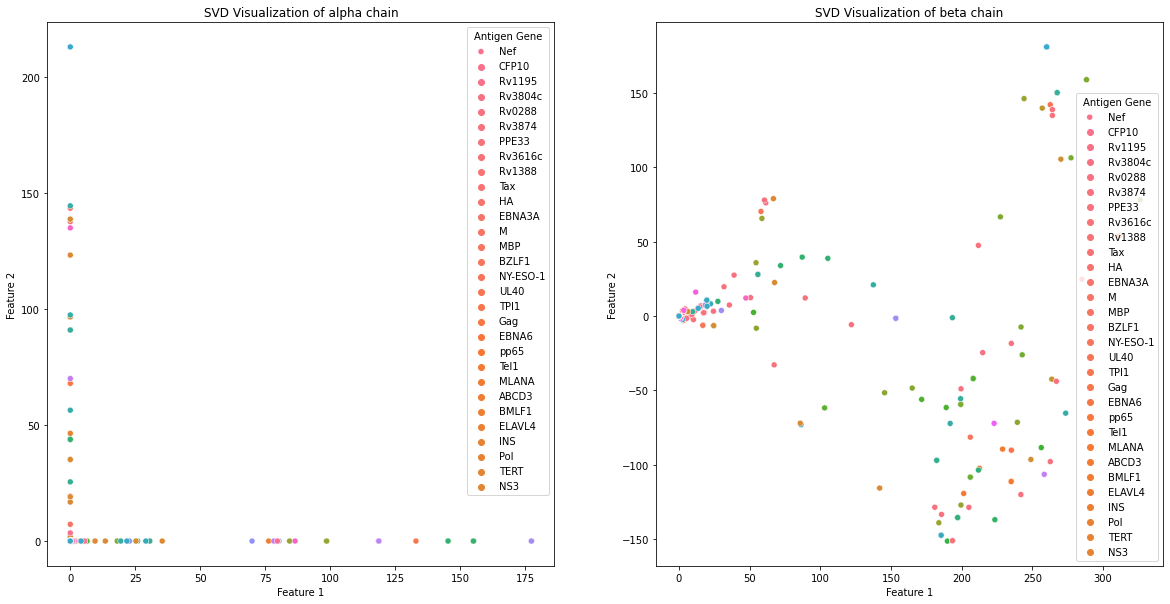

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x=alpha_reduced[:, 0], y=alpha_reduced[:, 1], hue=df_alpha['epitope'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('SVD Visualization of alpha chain')

# UMAP Visualization
sns.scatterplot(x=beta_reduced[:, 0], y=beta_reduced[:, 1], hue=df_beta['epitope'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('SVD Visualization of beta chain')

# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

In [39]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
svd = TruncatedSVD(n_components=50)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.22263632, 0.05989113, 0.03588165, 0.02833667, 0.02032375,
       0.01936519, 0.01765248, 0.01698668, 0.01603907, 0.01253609,
       0.01055071, 0.00971254, 0.00957979, 0.00905514, 0.00833357,
       0.00803482, 0.00776857, 0.00766109, 0.00762465, 0.00753205,
       0.00728098, 0.00604285, 0.00590038, 0.00539114, 0.00534289,
       0.00528434, 0.00522927, 0.00486429, 0.00493729, 0.00487323,
       0.0046996 , 0.00451695, 0.00426678, 0.00422422, 0.00405853,
       0.00384902, 0.0037951 , 0.00366353, 0.00364958, 0.00359546,
       0.00329526, 0.00324183, 0.00323628, 0.00321465, 0.00316715,
       0.00314844, 0.00312473, 0.00308453, 0.00306561, 0.0029344 ])

In [40]:
alpha_reduced

array([[ 1.34242942e-17,  1.20779510e-16, -1.59270422e-16, ...,
        -8.15047017e-17,  1.29370304e-17, -4.58230618e-17],
       [-5.62346014e-19,  4.12380735e-18, -1.95193381e-18, ...,
        -4.70093599e-17, -1.30738851e-17,  1.41032965e-17],
       [ 2.19693222e-10,  2.93666433e-09, -4.50550630e-08, ...,
        -3.08744050e-02, -1.26902950e-02,  5.19240458e-02],
       ...,
       [ 2.59729722e-35,  9.76032644e-35, -2.48923657e-34, ...,
         5.64647526e-28,  9.34056138e-28, -7.79887963e-28],
       [ 4.76465839e-35,  1.29779567e-34,  3.40755460e-34, ...,
        -1.40383805e-28,  6.85520654e-28, -2.81087091e-28],
       [ 4.16791944e+00,  2.75105815e-07,  4.74111256e-01, ...,
         5.74574858e-01,  3.41599203e+00,  2.49190902e-01]])

In [41]:
#using Tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
A_tsne = tsne.fit_transform(alpha_reduced[:10000])
B_tsne = tsne.fit_transform(beta_reduced[:10000])
A_tsne

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 14.797725 ,  15.236866 ],
       [ 31.58389  ,   7.2395573],
       [ -7.421267 , -15.104305 ],
       ...,
       [ 21.57174  ,  28.417305 ],
       [ 26.114338 ,  26.21505  ],
       [-29.772934 ,   4.4560895]], dtype=float32)

In [42]:
# using UMAP
# from umap import UMAP
# umap = UMAP(n_components=2, random_state=42)
# A_umap = umap.fit_transform(alpha_reduced[:100])
# B_umap = umap.fit_transform(beta_reduced[:100])

In [43]:
from sklearn.decomposition import PCA

# 创建PCA对象，设置要降维的目标维度为2
pca = PCA(n_components=2)

# 对稀疏矩阵进行PCA降维
A_pca = pca.fit_transform(alpha_reduced)
B_pca= pca.fit_transform(beta_reduced)

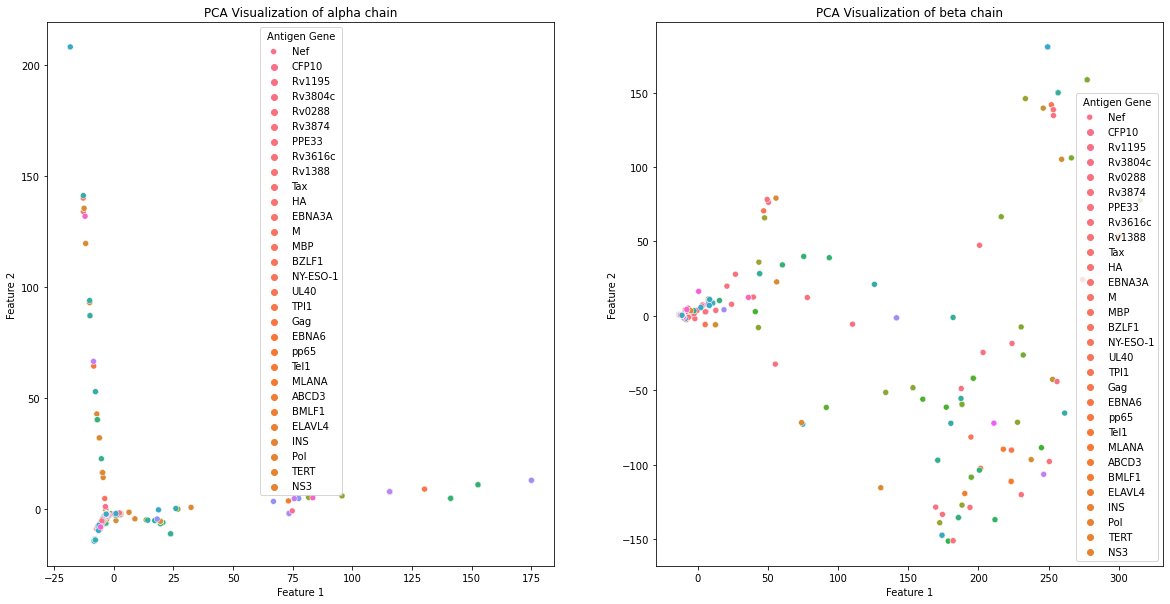

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE Visualization
sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1], hue=df_alpha['epitope'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('PCA Visualization of alpha chain')

# UMAP Visualization
sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['epitope'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('PCA Visualization of beta chain')

# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

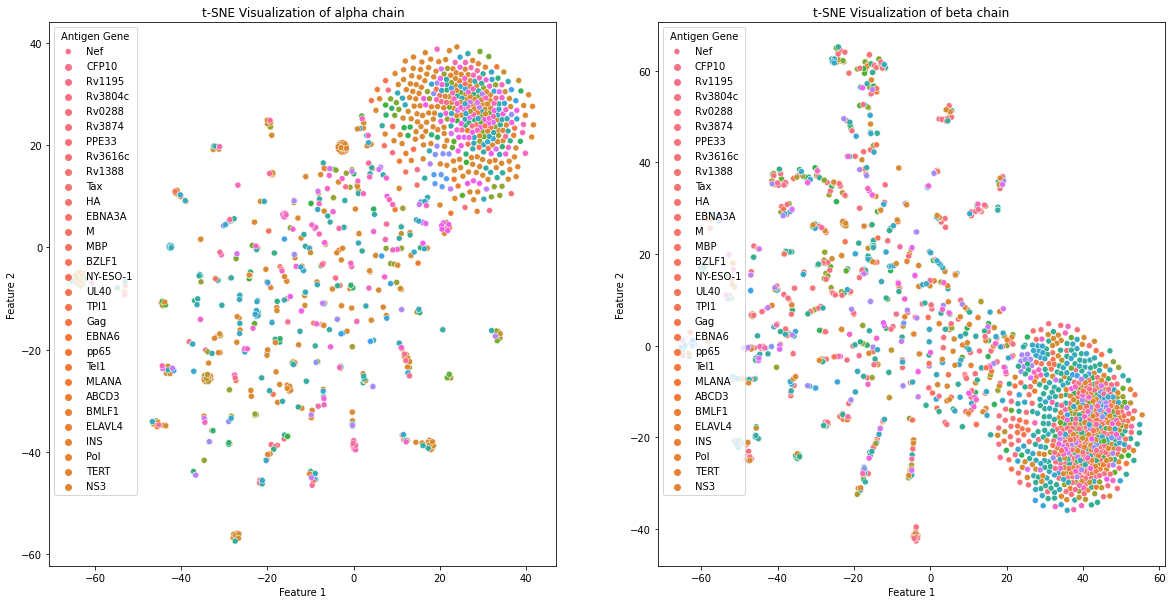

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE Visualization
sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['epitope'][:10000], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('t-SNE Visualization of alpha chain')
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['epitope'][:10000], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('t-SNE Visualization of beta chain')
# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

In [46]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

## Kmeans

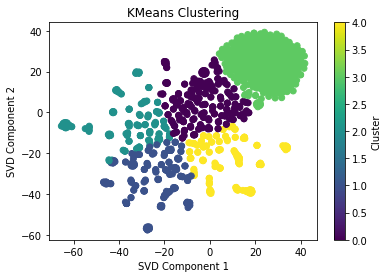

KMeans Silhouette Score: 0.4155822
KMeans Calinski-Harabasz Index: 1578.3950603178178


In [47]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import SpectralClustering

kmeans = KMeans(n_clusters=5)

kmeans.fit_predict(A_tsne)

clusters = kmeans.labels_
# Visualization
plt.scatter(A_tsne[:, 0], A_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()
# 计算轮廓系数和 Calinski-Harabasz 指数
silhouette_avg_kmeans = silhouette_score(A_tsne, clusters)
calinski_harabasz_avg_kmeans = calinski_harabasz_score(A_tsne, clusters)

print("KMeans Silhouette Score:", silhouette_avg_kmeans)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_avg_kmeans)
#轮廓系数为0.35778168，表明聚类具有中等的质量。虽然样本不是完全分开的（如果是完全分开的，轮廓系数会接近1），但大多数样本有比较清晰的聚类分界。
#Calinski-Harabasz指数为7507.1118086755705，这是一个相对较高的值，表明聚类效果相对较好，聚类内部较为紧凑，而不同聚类之间有较好的分离。

In [48]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
A_tsne[A_tsne<0] = 0
distances = pairwise_distances(A_tsne, metric='euclidean')
# 创建 DBSCAN 聚类器
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
clusters = dbscan.fit_predict(distances)

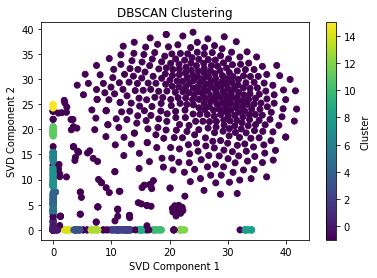

KMeans Silhouette Score: 0.5053571
KMeans Calinski-Harabasz Index: 209.32799726003125


In [49]:
# 绘制聚类结果
plt.scatter(A_tsne[:, 0], A_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# 计算轮廓系数和 Calinski-Harabasz 指数
silhouette_avg_dbscan = silhouette_score(A_tsne, clusters)
calinski_harabasz_avg_dbscan = calinski_harabasz_score(A_tsne, clusters)

print("KMeans Silhouette Score:", silhouette_avg_dbscan)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_avg_dbscan)

In [50]:
from sklearn.model_selection import train_test_split

# 创建整数编码的字典
amino_acid_mapping = {
    'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9,
    'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17,
    'V': 18, 'W': 19, 'Y': 20
}

# 将cdr3序列转换为整数表示
def cdr3_to_int(cdr3_seq):
    return [amino_acid_mapping[aa] for aa in cdr3_seq]


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 保留 'cdr3_a_aa', 'epitope', 'v_a_gene' 和 'j_a_gene' 列作为标签
labels = df_alpha[['cdr3_a_aa', 'epitope', 'v_a_gene', 'j_a_gene']].copy()

# 将 'cdr3_a_aa' 列转换为整数编码
labels['int_cdr3'] = labels['cdr3_a_aa'].apply(cdr3_to_int)

# 从特征中移除 'cdr3_a_aa', 'epitope', 'v_a_gene' 和 'j_a_gene' 列
features = df_alpha.drop(columns=['cdr3_a_aa', 'epitope', 'v_a_gene', 'j_a_gene'])

print(labels)

              cdr3_a_aa        epitope         v_a_gene   j_a_gene  \
0         CIVRAPGRADMRF       FLKEKGGL      TRAV26-1*01  TRAJ43*01   
1        CAVPSGAGSYQLTF       FLKEKGGL        TRAV20*01  TRAJ28*01   
2         CAYRPPGTYKYIF       FLKEKGGL  TRAV38-2/DV8*01  TRAJ40*01   
3         CIVRAPGRADMRF       FLKEQGGL      TRAV26-1*01  TRAJ43*01   
4        CAVPSGAGSYQLTF       FLKEQGGL        TRAV20*01  TRAJ28*01   
...                 ...            ...              ...        ...   
1376         CIALNARLMF   PQPELPYPQPQL      TRAV26-1*01  TRAJ31*01   
1377   CAMREGRYSSASKIIF   FPQPEQPFPWQP    TRAV14/DV4*01   TRAJ3*01   
1378   CLVGDGDGGATNKLIF   FPQPEQPFPWQP         TRAV4*01  TRAJ32*01   
1379  CAASVLYGSSNTGKLIF   QLQPFPQPELPY    TRAV29/DV5*01  TRAJ37*01   
1380       CAPQGATNKLIF  PQQPFPQPEQPFP      TRAV12-2*01  TRAJ32*01   

                                               int_cdr3  
0         [2, 8, 18, 15, 1, 13, 6, 15, 1, 3, 11, 15, 5]  
1     [2, 1, 18, 13, 16, 6, 1, 6, 16, 20, 1

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences

# 创建随机森林分类器对象
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 使用整数编码的序列和V基因、J基因作为特征，标签为'epitope'列
X_cdr3 = np.array(labels['int_cdr3'].tolist())
X_v_gene = np.array(labels['v_a_gene'])
X_j_gene = np.array(labels['j_a_gene'])
y = np.array(labels['epitope'])

# 使用填充序列确保所有序列具有相同的长度
X_cdr3_padded = pad_sequences(X_cdr3)

# 划分数据集为训练集和测试集
X_cdr3_train, X_cdr3_test, X_v_gene_train, X_v_gene_test, X_j_gene_train, X_j_gene_test, y_train, y_test = train_test_split(X_cdr3_padded, X_v_gene, X_j_gene, y, test_size=0.2, random_state=42)

# 将V基因和J基因编码为整数
v_gene_mapping = {gene: idx for idx, gene in enumerate(np.unique(X_v_gene))}
j_gene_mapping = {gene: idx for idx, gene in enumerate(np.unique(X_j_gene))}

X_v_gene_train_int = np.array([v_gene_mapping[gene] for gene in X_v_gene_train])
X_v_gene_test_int = np.array([v_gene_mapping[gene] for gene in X_v_gene_test])

X_j_gene_train_int = np.array([j_gene_mapping[gene] for gene in X_j_gene_train])
X_j_gene_test_int = np.array([j_gene_mapping[gene] for gene in X_j_gene_test])

# 合并特征
X_train = np.column_stack((X_cdr3_train, X_v_gene_train_int, X_j_gene_train_int))
X_test = np.column_stack((X_cdr3_test, X_v_gene_test_int, X_j_gene_test_int))

# 训练随机森林分类器
rf_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1748\3182150875.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_cdr3 = np.array(labels['int_cdr3'].tolist())


Accuracy: 0.515625


In [53]:
from sklearn.svm import SVC

# 创建支持向量机分类器对象
svm_classifier = SVC(kernel='linear', random_state=42)

# 训练支持向量机分类器
svm_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_svm = svm_classifier.predict(X_test)

# 评估模型性能
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.41796875


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# 创建梯度提升树分类器对象
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 训练梯度提升树分类器
gb_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_gb = gb_classifier.predict(X_test)

# 评估模型性能
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.39453125


In [55]:
from sklearn.neural_network import MLPClassifier

# 创建神经网络分类器对象
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# 训练神经网络分类器
nn_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_nn = nn_classifier.predict(X_test)

# 评估模型性能
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

Neural Network Accuracy: 0.4296875


In [56]:
# from sklearn.preprocessing import LabelEncoder
# 
# # 创建标签编码器
# label_encoder = LabelEncoder()
# 
# # 对 'gene' 列进行标签编码
# features_encoded = features.copy()  # 创建特征的副本以避免修改原始数据
# features_encoded['gene_encoded'] = label_encoder.fit_transform(features['gene'])
# 
# # 删除原始 'gene' ,'species'列
# features_encoded.drop(columns=['gene'], inplace=True)
# features_encoded.drop(columns=['species'], inplace=True)
# # 显示转换后的特征集
# print(features_encoded)

In [57]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# 
# # 假设 df 是包含 cdr3_a_aa 和 epitope 的 DataFrame
# 
# # 序列编码：将序列转换为独热编码
# encoder = OneHotEncoder(sparse=False)
# X = encoder.fit_transform(df['cdr3_a_aa'].values.reshape(-1, 1))
# 
# # 标签编码：将表位转换为数值标签
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['epitope'])
# 
# # 划分数据集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # 创建 SVM 模型
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)
# 
# # 预测
# y_pred = model.predict(X_test)
# 
# # 评估模型
# accuracy = accuracy_score(y_test, y_pred)
# print("准确率:", accuracy)

In [58]:
# from sklearn.ensemble import RandomForestClassifier
# # 创建随机森林分类器实例
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# 
# # 训练模型
# rf.fit(X_train, y_train)
# 
# # 预测
# y_pred_rf = rf.predict(X_test)
# 
# # 评估模型
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("随机森林准确率:", accuracy_rf)

In [59]:
# import matplotlib.pyplot as plt
# 
# feature_importances = rf.feature_importances_
# plt.figure(figsize=(10, 8))
# plt.bar(range(len(feature_importances)), feature_importances)
# plt.xlabel('Feature Index')
# plt.ylabel('Importance')
# plt.title('Feature Importance')
# plt.show()

In [60]:
# from sklearn.model_selection import GridSearchCV
# 
# # 设置参数网格
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4, 6, 8, 10],
#     'criterion' :['gini', 'entropy']
# }
# 
# # 创建网格搜索对象
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# 
# # 输出最佳参数
# print("最佳参数:", grid_search.best_params_)
# best_rf = grid_search.best_estimator_
# 
# # 使用最佳模型进行预测
# y_pred_best_rf = best_rf.predict(X_test)
# accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
# print("调优后的随机森林准确率:", accuracy_best_rf)


## DBSCAN



